In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
# Read a CSV file into a DataFrame using pandas
df = pd.read_csv(r"C:\Users\Mandela Tangban\Documents\Zummit AI-ML Learning Path\California_House_Price.csv")

In [3]:
# Display the first five rows of the DataFrame 'df'.
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
# Display a summary of the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
# Display the dimensions of the DataFrame 'df' as a tuple
df.shape

(20640, 10)

In [6]:
# Calculate the number of missing (null) values in each column of the DataFrame 'df'
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
# Calculate the percentage of missing (null) values in each column of the DataFrame 'df'
df.isnull().mean()*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

In [10]:
# Calculate the number of missing (null) values in each column of the DataFrame 'df'
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [11]:
# Check for duplicates in the entire DataFrame and drop them in place
df.drop_duplicates(inplace=True)

# Count the number of duplicate rows
num_duplicate_rows = df.duplicated().sum()

# Display the number of duplicate rows
print("Number of duplicate rows:", num_duplicate_rows)

# Display the duplicate rows themselves
duplicate_rows_df = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows_df)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity, median_house_value]
Index: []


In [12]:
# Generate descriptive statistics of the DataFrame 'df'
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix of the numeric DataFrame
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069260 -0.066658           -0.318998     0.927253   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069260    0.099773    0.055310      -0.015176   
latitude                 -0.066658   -0.108785   -0.071035      -

<Figure size 1000x1000 with 0 Axes>

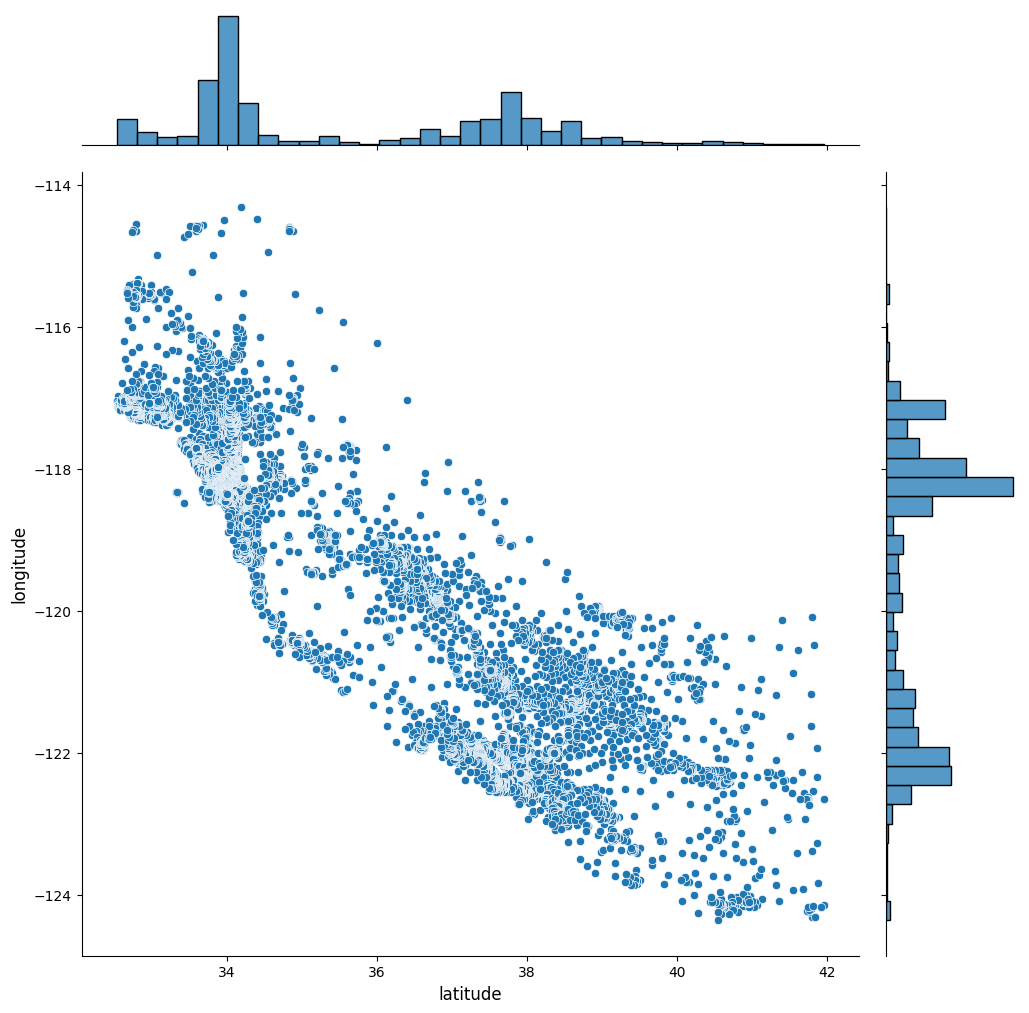

<Figure size 640x480 with 0 Axes>

In [17]:
# Create a new figure with a specified size (10 inches by 10 inches)
plt.figure(figsize=(10, 10))

# Create a joint plot (scatter plot with histograms) using seaborn
sns.jointplot(x=df.latitude.values, y=df.longitude.values, height=10)

# Set the label for the y-axis (longitude) with a font size of 12
plt.ylabel('longitude', fontsize=12)

# Set the label for the x-axis (latitude) with a font size of 12
plt.xlabel('latitude', fontsize=12)

# Display the plot
plt.show()

# Remove the top and right spines from the plot for a cleaner look
sns.despine()

C:\Users\Mandela Tangban\AppData\Local\Temp\ipykernel_260\3823389060.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ocean_proximity', y='median_house_value', data=avg_median_house_value_per_proximity, palette='viridis')


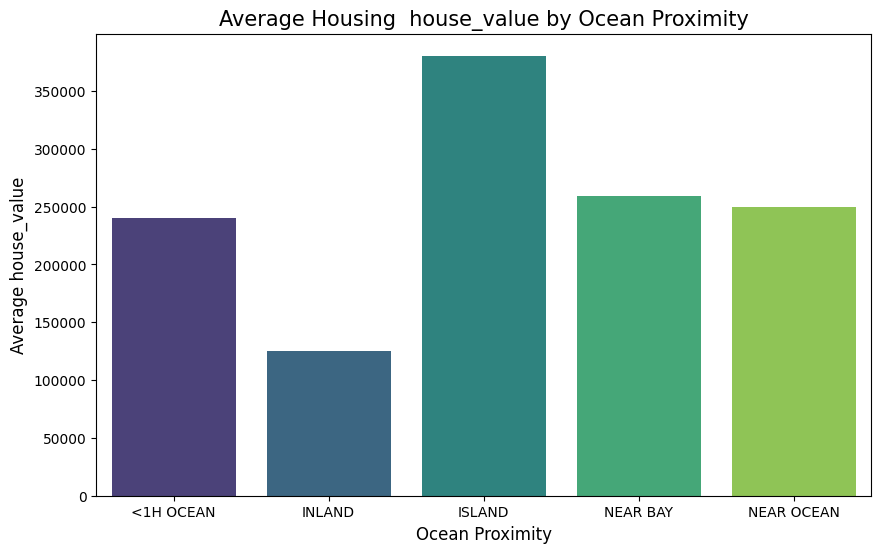

In [19]:
# Calculate the average median_house_value for each ocean proximity category
avg_median_house_value_per_proximity = df.groupby('ocean_proximity')['median_house_value'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='ocean_proximity', y='median_house_value', data=avg_median_house_value_per_proximity, palette='viridis')

# Add labels and title
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('Average house_value', fontsize=12)
plt.title('Average Housing  house_value by Ocean Proximity', fontsize=15)

# Show plot
plt.show()

Text(0.5, 1.0, 'Price vs Acre Lot')

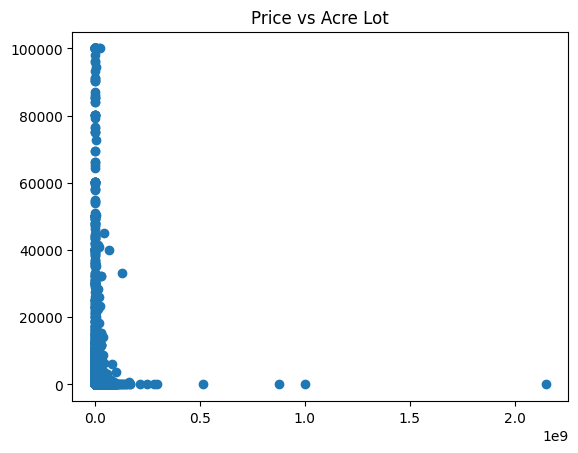

In [29]:
# Create a scatter plot with 'price' on the x-axis and 'acre_lot' on the y-axis
plt.scatter(df.price, df.acre_lot)

# Set the title of the scatter plot
plt.title('Price vs Acre Lot')

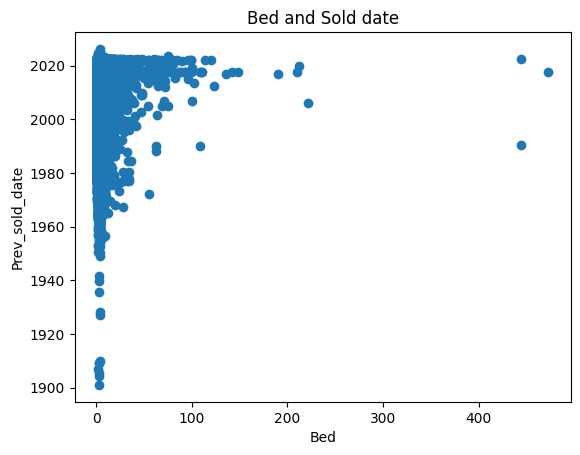

<Figure size 640x480 with 0 Axes>

In [30]:
# Create a scatter plot with 'bed' on the x-axis and 'prev_sold_date' on the y-axis
plt.scatter(df.bed, df.prev_sold_date)

# Set the title of the plot
plt.title("Bed and Sold date")

# Set the label for the x-axis
plt.xlabel("Bed")

# Set the label for the y-axis
plt.ylabel("Prev_sold_date")

# Display the plot
plt.show()

# Remove the top and right spines from the plot
sns.despine()

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

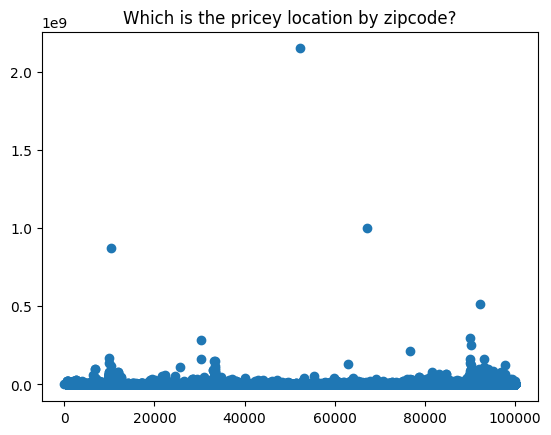

In [31]:
# Create a scatter plot with 'zip_code' on the x-axis and 'price' on the y-axis
plt.scatter(df.zip_code, df.price)

# Set the title of the scatter plot
plt.title("Which is the pricey location by zipcode?")

In [32]:
# Import the LinearRegression class from the linear_model module of the scikit-learn library.
from sklearn.linear_model import LinearRegression

In [47]:
# Extracting date and time features
df['year'] = df['prev_sold_date'].dt.year
df['month'] = df['prev_sold_date'].dt.month
df['day'] = df['prev_sold_date'].dt.day
df['hour'] = df['prev_sold_date'].dt.hour
df['minute'] = df['prev_sold_date'].dt.minute
df['second'] = df['prev_sold_date'].dt.second
df['dayofweek'] = df['prev_sold_date'].dt.dayofweek  # Monday=0, Sunday=6

# Optionally drop the original datetime column if not needed
df.drop('prev_sold_date', axis=1, inplace=True)

# Display the transformed DataFrame
print(df.head())

KeyError: 'prev_sold_date'

In [35]:
from sklearn.preprocessing import LabelEncoder

# list of categorical (string) columns in the DataFrame
categorical_columns = ['status', 'city', 'state'] 

# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the transformed DataFrame
print(df.head())

   brokered_by  status     price  bed  bath  acre_lot     street   city  \
0     103378.0       0  105000.0  3.0   2.0      0.12  1962661.0     92   
1      52707.0       0   80000.0  4.0   2.0      0.08  1902874.0     92   
2     103379.0       0   67000.0  2.0   1.0      0.15  1404990.0   8786   
3      31239.0       0  145000.0  4.0   2.0      0.10  1947675.0  14312   
4      34632.0       0   65000.0  6.0   2.0      0.05   331151.0  10934   

   state  zip_code   house_size  year  month  day  hour  minute  second  \
0     41     601.0   920.000000  2017      8   16     4       1       7   
1     41     601.0  1527.000000  2017      8   16     4       1       7   
2     41     795.0   748.000000  2017      8   16     4       1       7   
3     41     731.0  1800.000000  2017      8   16     4       1       7   
4     41     680.0  2714.576625  2017      8   16     4       1       7   

   dayofweek  
0          2  
1          2  
2          2  
3          2  
4          2  


In [36]:
# Assign string columns to the variable 'categorical columns'
categorical_columns = ['status', 'city', 'state']

# Define a threshold for grouping rare categories
threshold = 100  

for col in categorical_columns:
    value_counts = df[col].value_counts()
    to_replace = value_counts[value_counts <= threshold].index
    df[col] = df[col].replace(to_replace, 'Other')

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the transformed DataFrame
print(df.head())

   brokered_by     price  bed  bath  acre_lot     street  zip_code  \
0     103378.0  105000.0  3.0   2.0      0.12  1962661.0     601.0   
1      52707.0   80000.0  4.0   2.0      0.08  1902874.0     601.0   
2     103379.0   67000.0  2.0   1.0      0.15  1404990.0     795.0   
3      31239.0  145000.0  4.0   2.0      0.10  1947675.0     731.0   
4      34632.0   65000.0  6.0   2.0      0.05   331151.0     680.0   

    house_size  year  month  ...  state_46  state_47  state_48  state_49  \
0   920.000000  2017      8  ...     False     False     False     False   
1  1527.000000  2017      8  ...     False     False     False     False   
2   748.000000  2017      8  ...     False     False     False     False   
3  1800.000000  2017      8  ...     False     False     False     False   
4  2714.576625  2017      8  ...     False     False     False     False   

   state_50  state_51  state_52  state_53  state_54  state_Other  
0     False     False     False     False     False    

In [37]:
# Extract the 'price' column from the dataset and assign it to the variable 'labels'
labels = df['price']

# Create a new DataFrame 'train1' by dropping the 'price' columns from the original dataset
train1 = df.drop(['price'], axis=1)

In [38]:
# Initialize a LinearRegression model and assign it to the variable 'reg'
reg = LinearRegression()

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Function to process each chunk
def process_chunk(chunk):
    # Perform necessary preprocessing on the chunk
    # Modify this function based on actual preprocessing requirements
    return chunk

# Initialize an empty list to store processed chunks
chunks = []

# Read and process the data in chunks
file_path = r"C:\Users\Mandela Tangban\Documents\Zummit AI-ML Learning Path\archive2\realtor-data.zip.csv"
for chunk in pd.read_csv(file_path, chunksize=10000):
    processed_chunk = process_chunk(chunk)
    chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame
df_processed = pd.concat(chunks, ignore_index=True)

# Extract labels and features
labels = df_processed['price']
train1 = df_processed.drop(['price'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train1, labels, test_size=0.2, random_state=42)

In [65]:
# Reduce cardinality by keeping only the top N most frequent categories for each categorical column
N = 10  # Adjust the value of N as needed

# Function to reduce cardinality of categorical columns
def reduce_cardinality(df, columns, N):
    for col in columns:
        top_categories = df[col].value_counts().nlargest(N).index
        df[col] = df[col].where(df[col].isin(top_categories), 'Other')
    return df

# Apply cardinality reduction to categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
X_train_reduced = reduce_cardinality(X_train.copy(), categorical_columns, N)

# One-hot encode categorical variables with sparse output
X_train_encoded = pd.get_dummies(X_train_reduced, sparse=True)

# Continue with model training using X_train_encoded

In [67]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train_encoded)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:872: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1069: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:872: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1069: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):


In [70]:
# Remove rows with missing target values
missing_indices = y_train.isnull()
X_train_imputed = X_train_imputed[~missing_indices]
y_train = y_train[~missing_indices]

In [71]:
# Train the model on the cleaned training data
reg.fit(X_train_imputed, y_train)

LinearRegression()